# Simple Linear Regression. Minimal example. Exercise - Solution

# Using the same code as before, please solve the following exercises
    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start. 
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

Find the variable "loss", where we defined the loss function. Change it from:

"loss = np.sum(deltas ** 2) / 2 / observations"

to 

"loss = np.sum(deltas ** 2) / observations"
    





Here are some takeaways:
1. It takes the algorithm the same time to finish working.
2. The loss is as minimized as the one in the lecture.
3. The weights and biases are almost the same as the ones in the lecture.
4. The problem is as solved as that in the lecture.
5. More iterations would yield a better result./


## Import relevant libraries

In [1]:
# mathematical operations
import numpy as np

#nice graphs
import matplotlib.pyplot as plt

#nice 3D graphs
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

This part is not part of the ML algorithm, create "fake" data, cuz in real-life, we would normally import data from some external sources.

In [2]:
observations = 100000

#We are about to create a two variable linear model
# f(x,z) = a*x + b*z + c
Xs = np.random.uniform(low=-10, high=10, size=(observations,1))
Zs = np.random.uniform(-10, 10, size=(observations,1))

# Combine 2 (Xs, Zs) into a 2-column matrix
# This results in a matrix with dimensions 1000x2.
inputs = np.column_stack((Xs, Zs))

print(inputs.shape)

(100000, 2)


## Elements of the model in supervized learning

1) inputs => done 

2) weights => computer

3) biases => computer

4) outputs => computer

5) targets => to do

## Create the targets we will aim at

### Targets = f(x,z) = 2x - 3z + 5 + noise

2 is the target weight_1

-3 is the target weight_2

5 is the target bias

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*Xs - 3*Zs + 5 + noise

print(targets.shape)

(100000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

In [4]:
targets

array([[-22.0315009 ],
       [ 17.16257258],
       [ 22.47228065],
       ...,
       [ 15.33602037],
       [ -2.2323951 ],
       [ 25.96835572]])

In [5]:
Xs

array([[-6.26457874],
       [-3.20629695],
       [ 3.01549812],
       ...,
       [-8.68602866],
       [-3.88942725],
       [ 8.97687988]])

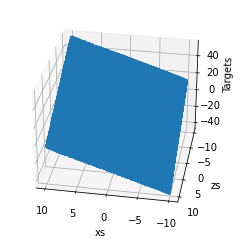

In [6]:
tagets = targets.reshape(observations,)
Xs = Xs.reshape(observations,)
Zs = Zs.reshape(observations,)
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(Xs, Zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

## Initialize variable

In [7]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.07318455]
 [ 0.07192108]]
[0.01502416]


### Set a learning rate

In [8]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

## Train the model

In [12]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs-targets
    
    # L2-norm loss formula: sum[(outputs-targets)^2]
    # Loss/observation = Mean (average) loss
    loss = np.sum(deltas ** 2) / observations
    
    # We print the loss at each step, as we want to keep an eye on whether it is DECREASING
    # If it is decreasing, our ML algorithm functions well
    print(loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    # You can try solving the problem without rescaling to see how that works for you.
    deltas_scaled = deltas / observations
    
    # Update the WEIGHTS and BIASES so they are ready for the next iteration.
    # Finally, we must apply the gradient descent update rules from the relevant lecture.
    # The weights are 2x1, learning rate is 1x1 (scalar), INPUTS are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the INPUTS so that we get an allowed operation. -> INPUTS (2x1000)
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    #Note: transposing matrices doesn't affect the information they hold, so we can do it freely.
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

0.7695820506321657
0.7522586285033208
0.7356212122696333
0.7196426361618519
0.7042968101726459
0.6895586774565333
0.6754041734167677
0.6618101864123829
0.6487545200212317
0.6362158567974074
0.6241737234638641
0.6126084574834123
0.6015011749534959
0.5908337397723329
0.5805887340260741
0.5707494295486286
0.5612997606077152
0.5522242976725529
0.5435082222203309
0.5351373025403569
0.5270978704963499
0.5193767992089476
0.5119614816219792
0.5048398099175219
0.49800015574610623
0.49143135123981674
0.4851226707772608
0.4790638134706482
0.473244886346383
0.46765638819169725
0.4622891940409587
0.45713454027632267
0.452184010318387
0.4474295208835099
0.4428633087853239
0.4384779182589144
0.4342661887869615
0.43022124340795975
0.42633647748743564
0.42260554793382377
0.41902236284139005
0.4155810715432984
0.41227605505857223
0.4091019169173531
0.4060534743494871
0.4031257498220325
0.4003139629118848
0.3976135225002496
0.39502001927620406
0.3925292185371287
0.39013705327422826
0.3878396175318773
0.3

### Print weights and biases and see if we have worked correctly.

In [13]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be convergING. So more iterations are needed.

[[ 2.00010094]
 [-3.00008596]] [4.9148537]


After the first for...loop run we get the weights: Xs=1.99, Zs=-3.00.

So the weights seems about right.

The bias is 4.3 quite close to 5, but we want more.

That's because we use to few iteration or an inappropriate learning rate. So let re-run the for..loop for another 100 iterations.

After the second loop, we get the weights: Xs=2.00, Zs=-3.00

And the bias has increased to 4.9 

### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

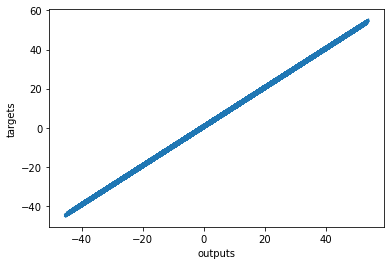

In [11]:
# We print the outputs and the targets in order to see if they have a linear relationship.
# Again, that's not needed. Moreover, in later lectures, that would not even be possible.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()